# Geodatenhandling 1

**Inhalt:** Etwas mehr als nur erste Schritte mit Geopandas

**Nötige Skills**
- Basic pandas skills
- Funktionen und pandas
- Erste Schritte mit Geopandas

**Lernziele**
- Koordinatensysteme kennenlernen
- Koordinaten transformieren
- Spatial Joins
- Choropleth maps

## Das Beispiel

Coop-Läden in der Schweiz.
- Liste "gescrapt" von hier: https://www.coop.ch/de/services/standorte-und-oeffnungszeiten.html
- Siehe File `Coop.ipynb`

Wir wollen diese Läden auf einer Karte als Punkte darstellen und wollen ausserdem auswerten, in welchen Kantonen es wieviele Läden gibt!

## Setup

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString
%matplotlib inline

## Import

**Wir verwenden wiederum ein Shapefile der Kantone**

In [2]:
gdf_kantone = gpd.read_file('dataprojects/Projections/shp/g1k17.shp')

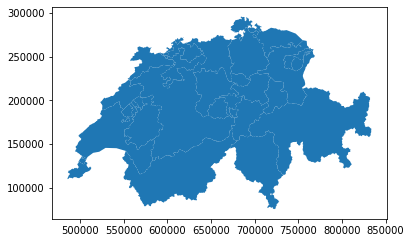

In [3]:
gdf_kantone.plot()

**Liste der Coop-Läden**

In [4]:
df_stores = pd.read_csv('dataprojects/Coop/geschaefte.csv')

In [5]:
df_stores.head(10)

,hausnummer,latitude,longitude,name,ort,plz,strasse,typ
0,42,46.837574,8.186167,coop-supermarkt-giswil,Giswil,6074,Brünigstrasse,retail
1,2,46.728708,8.181781,coop-supermarkt-meiringen,Meiringen,3860,Alpwegern,retail
2,32,46.897303,8.251211,coop-supermarkt-sarnen,Sarnen,6060,Marktstrasse,retail
3,32,46.897303,8.251211,coop-restaurant-sarnen,Sarnen,6060,Marktstrasse,restaurant
4,5,46.820871,8.404397,coop-supermarkt-engelberg,Engelberg,6390,Titliszentrum,retail
5,5,46.820871,8.404397,coop-restaurant-engelberg,Engelberg,6390,Titliszentrum,restaurant
6,139,46.754612,8.036984,coop-supermarkt-brienz,Brienz,3855,Hauptstrasse,retail
7,1,46.937705,8.269723,coop-supermarkt-alpnach,Alpnach-Dorf,6055,Schoriederstrasse,retail
8,4/6,46.958373,8.368674,coop-supermarkt-stans,Stans,6370,Buochserstrasse,retail
9,4/6,46.958373,8.368674,coop-restaurant-stans,Stans,6370,Buochserstrasse,restaurant


In [6]:
df_stores['typ'].value_counts()

retail        923
pronto        318
id            183
restaurant    155
impo          119
vitality       78
bh             73
christ         66
city           31
livique        24
togo           18
lumimart       18
takeit         15
marche         13
hotel          10
capuccini       8
burger          5
toptip          4
cindy           3
sapori          3
zopf            3
karma           2
halba           2
perpiedi        1
Name: typ, dtype: int64

## Geometrie

Wir müssen aus unserer Liste wiederum ein GeoDataFrame erstellen.

Die Schritte dazu sind:
- Identifizieren, welche Spalte die geografischen Infos enthält
- Geometrie-Spalte im Dataframe erstellen
- Aus Dataframe ein GeoDataFrame machen

**Spalte identifizieren**

In [7]:
df_stores.columns

Index(['hausnummer', 'latitude', 'longitude', 'name', 'ort', 'plz', 'strasse',
       'typ'],
      dtype='object')

Mehr Infos zum geodetic system: https://gps-coordinates.org/

**Geometrie erstellen**

In [8]:
df_stores['Punkt'] = df_stores.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

In [9]:
df_stores.head(10)

,hausnummer,latitude,longitude,name,ort,plz,strasse,typ,Punkt
0,42,46.837574,8.186167,coop-supermarkt-giswil,Giswil,6074,Brünigstrasse,retail,POINT (8.186166999999999 46.837574)
1,2,46.728708,8.181781,coop-supermarkt-meiringen,Meiringen,3860,Alpwegern,retail,POINT (8.181780999999999 46.728708)
2,32,46.897303,8.251211,coop-supermarkt-sarnen,Sarnen,6060,Marktstrasse,retail,POINT (8.251211 46.897303)
3,32,46.897303,8.251211,coop-restaurant-sarnen,Sarnen,6060,Marktstrasse,restaurant,POINT (8.251211 46.897303)
4,5,46.820871,8.404397,coop-supermarkt-engelberg,Engelberg,6390,Titliszentrum,retail,POINT (8.404396999999999 46.820871)
5,5,46.820871,8.404397,coop-restaurant-engelberg,Engelberg,6390,Titliszentrum,restaurant,POINT (8.404396999999999 46.820871)
6,139,46.754612,8.036984,coop-supermarkt-brienz,Brienz,3855,Hauptstrasse,retail,POINT (8.036984 46.754612)
7,1,46.937705,8.269723,coop-supermarkt-alpnach,Alpnach-Dorf,6055,Schoriederstrasse,retail,POINT (8.269722999999999 46.937705)
8,4/6,46.958373,8.368674,coop-supermarkt-stans,Stans,6370,Buochserstrasse,retail,POINT (8.368674 46.95837299999999)
9,4/6,46.958373,8.368674,coop-restaurant-stans,Stans,6370,Buochserstrasse,restaurant,POINT (8.368674 46.95837299999999)


**Geodataframe kreieren**

In [10]:
gdf_stores = gpd.GeoDataFrame(df_stores, geometry='Punkt')

In [11]:
gdf_stores.head(2)

,hausnummer,latitude,longitude,name,ort,plz,strasse,typ,Punkt
0,42,46.837574,8.186167,coop-supermarkt-giswil,Giswil,6074,Brünigstrasse,retail,POINT (8.18617 46.83757)
1,2,46.728708,8.181781,coop-supermarkt-meiringen,Meiringen,3860,Alpwegern,retail,POINT (8.18178 46.72871)


Hat es funktioniert?

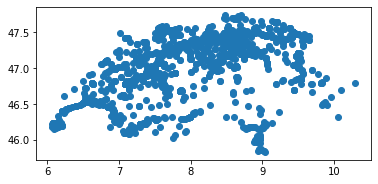

In [12]:
gdf_stores.plot()

## Koordinaten transformieren

Machen wir nun dasselbe wie im vorherigen Notebook: Plotten wir die Coop-Standorte auf die Schweizer Karte!

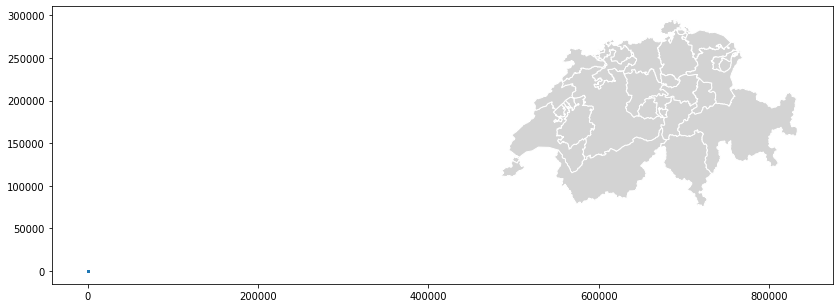

In [13]:
ax = gdf_kantone.plot(figsize=(14,10), color='lightgrey', edgecolor='white')
gdf_stores.plot(markersize=3, ax=ax)

Das Problem ist: die beiden Geodataframes verwenden verschiedene Koordinatensysteme!

Das Koordinatensystem in Geodataframes ist in der Property `crs` gespeichert.

**Kantone: Schweizer Koordinatensystem**
siehe: https://de.wikipedia.org/wiki/Schweizer_Landeskoordinaten

In [14]:
gdf_kantone.crs     ##coordinate reference system

{'init': 'epsg:21781'}

**Geschäfte: Haben noch keines!**

In [15]:
gdf_stores.crs

Allerdings wissen wir, dass die Koordinaten im world geodetic system kodiert sind. Um dies Geopandas mitzuteilen, müssen wir das Geodataframe mit einem bestimmten Code initiatilisieren:

In [16]:
gdf_stores.crs = {'init': 'epsg:4326'}   ### epsg: european petroleum survey group

In [17]:
gdf_stores.crs

{'init': 'epsg:4326'}

**EPSG-Codes**

EPSG steht für European Petroleum Survey Group:
- https://epsg.io/

Jedes Koordinatensystem hat eine Nummer
- https://de.wikipedia.org/wiki/European_Petroleum_Survey_Group_Geodesy#EPSG-Codes

Ein paar gängige Nummern

| Code | Description |
|------|---------------------------|
| 4326 | #world geodetic system |
| 3857 | #mercator |
| 2163 | #nice aea projection for the USA |
| 5071 | #another good one for the USA |
| 3395 | #mercator (anotherone) |
| 21781 | #swiss coordinate system |

Wir wollen das Schweizer Koordinatensystem verwenden. Um die Koordinaten zu transformieren, verwenden wir `to_crs()`:

In [18]:
gdf_stores = gdf_stores.to_crs({'init': 'epsg:4326'})

/home/pc/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Jetzt sind beide Geodataframes im selben Koordinatensystem kodiert und wir können sie auf einer Karte plotten

In [19]:
gdf_stores

,hausnummer,latitude,longitude,name,ort,plz,strasse,typ,Punkt
0,42,46.837574,8.186167,coop-supermarkt-giswil,Giswil,6074,Brünigstrasse,retail,POINT (8.18617 46.83757)
1,2,46.728708,8.181781,coop-supermarkt-meiringen,Meiringen,3860,Alpwegern,retail,POINT (8.18178 46.72871)
2,32,46.897303,8.251211,coop-supermarkt-sarnen,Sarnen,6060,Marktstrasse,retail,POINT (8.25121 46.89730)
3,32,46.897303,8.251211,coop-restaurant-sarnen,Sarnen,6060,Marktstrasse,restaurant,POINT (8.25121 46.89730)
4,5,46.820871,8.404397,coop-supermarkt-engelberg,Engelberg,6390,Titliszentrum,retail,POINT (8.40440 46.82087)
5,5,46.820871,8.404397,coop-restaurant-engelberg,Engelberg,6390,Titliszentrum,restaurant,POINT (8.40440 46.82087)
6,139,46.754612,8.036984,coop-supermarkt-brienz,Brienz,3855,Hauptstrasse,retail,POINT (8.03698 46.75461)
7,1,46.937705,8.269723,coop-supermarkt-alpnach,Alpnach-Dorf,6055,Schoriederstrasse,retail,POINT (8.26972 46.93771)
8,4/6,46.958373,8.368674,coop-supermarkt-stans,Stans,6370,Buochserstrasse,retail,POINT (8.36867 46.95837)
9,4/6,46.958373,8.368674,coop-restaurant-stans,Stans,6370,Buochserstrasse,restaurant,POINT (8.36867 46.95837)


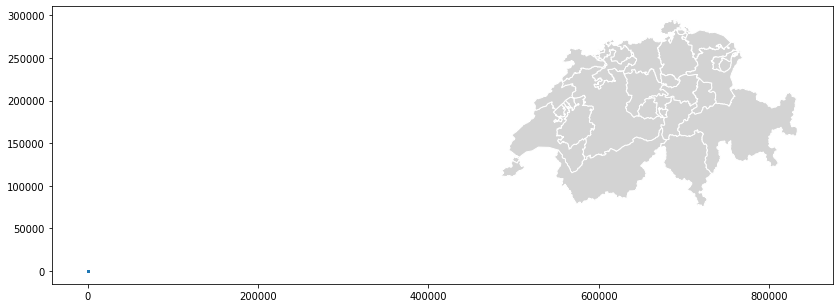

In [20]:
ax = gdf_kantone.plot(figsize=(14,10), color='lightgrey', edgecolor='white')
gdf_stores.plot(markersize=3, ax=ax)

**Zusatzaufgabe:** Plotten Sie die verschiedenen Geschäftstypen je in eigenen Farben!

In [21]:
colors = {
    'retail': 'blue',
    'pronto': 'green',
    'id': 'orange',
    'restaurant': 'red',
    'impo': 'darkblue',
    'vitality': 'darkgreen',
    'bh': 'black',
    'christ': 'black',
    'city': 'black',
    'livique': 'black',
    'togo': 'black',
    'lumimart': 'black',
    'takeit': 'black',
    'marche': 'black',
    'hotel': 'black',
    'capuccini': 'black',
    'burger': 'black',
    'toptip': 'black',
    'cindy': 'black',
    'sapori': 'black',
    'zopf': 'black',
    'karma': 'black',
    'halba': 'black',
    'perpiedi': 'black'
}

In [22]:
colorlist = gdf_stores['typ'].apply(lambda typ: colors[typ])

In [23]:
colorlist.value_counts(dropna=False)

blue         923
green        318
black        299
orange       183
red          155
darkblue     119
darkgreen     78
Name: typ, dtype: int64

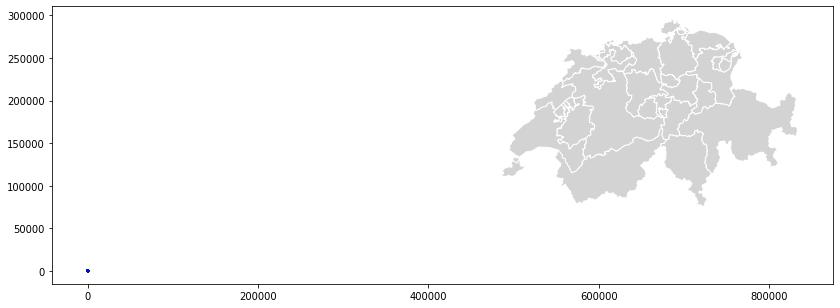

In [24]:
ax = gdf_kantone.plot(figsize=(14,10), color='lightgrey', edgecolor='white')
gdf_stores.plot(markersize=3, ax=ax, color=colorlist, alpha=0.6)

## Geo-Selektion

Was könnten wir nun mit diesen beiden Datensets anfangen, die im selben System kodiert sind (ausser sie zu plotten)?

Zum Beispiel:
- Einzelne Geschäfte selektieren (je nach Kanton)
- Gschäfte pro Kanton zählen

### spatial joins

Ähnlich wie `merge()` in Pandas bietet auch Geopandas eine Funktion an, um zwei Datensets zu kombinieren: `sjoin()`

In [25]:
gdf_merged = gpd.sjoin(gdf_stores, gdf_kantone, how='left', op='within')

/home/pc/anaconda3/lib/python3.7/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != {'init': 'epsg:21781'})
  "(%s != %s)" % (left_df.crs, right_df.crs)


Wir wählen hier zu jeder Zeile aus dem ersten GDF (gdf_stores, also die Geschäfte) die passende Zeile aus dem anderen GDF (gdf_kantone, also den passenden Kanton) aus.

`how=` gibt wie in pandas an, wie wir matchen wollen:
- "left"
- "right"
- "inner"
- "outer"

`op=` gibt die geometrische matching-methode an:
- "contains" (linke geometrie enthält rechte geometrie)
- "within" (linke geometrie ist innnerhalb rechter geometrie)
- "intersects" (linke geometrie überschneidet sich mit rechter geometrie)

In unserem Fall haben wir also gesagt:
- suche zu jedem store-punkt das passende kantons-polygon
- wobei der punkt innerhalb des polygons liegen muss

Nun haben wir ein zusammengeführtes, ziemlich breites geodataframe:

In [26]:
gdf_merged.columns

Index(['hausnummer', 'latitude', 'longitude', 'name', 'ort', 'plz', 'strasse',
       'typ', 'Punkt', 'index_right', 'KTNR', 'KTNAME', 'GRNR', 'AREA_HA',
       'X_MIN', 'X_MAX', 'Y_MIN', 'Y_MAX', 'X_CNTR', 'Y_CNTR', 'Z_MIN',
       'Z_MAX', 'Z_AVG', 'Z_MED', 'E_MIN', 'E_MAX', 'N_MIN', 'N_MAX', 'E_CNTR',
       'N_CNTR'],
      dtype='object')

Und das Gute ist: zu jeder Coop-Filiale ist nun die Information enthalten, in welchem Kanton sie liegt.

In [27]:
gdf_merged['KTNAME']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
       ... 
2045    NaN
2046    NaN
2047    NaN
2048    NaN
2049    NaN
2050    NaN
2051    NaN
2052    NaN
2053    NaN
2054    NaN
2055    NaN
2056    NaN
2057    NaN
2058    NaN
2059    NaN
2060    NaN
2061    NaN
2062    NaN
2063    NaN
2064    NaN
2065    NaN
2066    NaN
2067    NaN
2068    NaN
2069    NaN
2070    NaN
2071    NaN
2072    NaN
2073    NaN
2074    NaN
Name: KTNAME, Length: 2075, dtype: object

Das ermöglicht uns zB, nur Stores aus einem einzelnen Kanton zu bearbeiten:

/home/pc/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:510: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


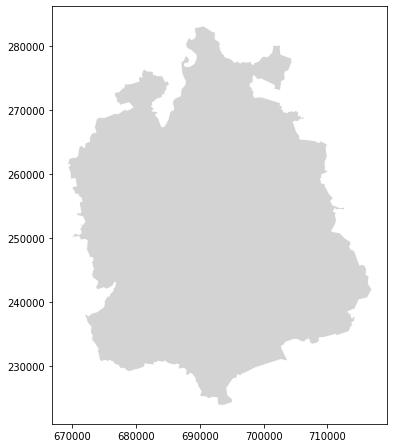

In [28]:
ax = gdf_kantone[gdf_kantone['KTNAME'] == 'Zürich'].plot(color='lightgrey', edgecolor='white', figsize=(6,8))
gdf_merged[gdf_merged['KTNAME'] == 'Zürich'].plot(markersize=3, alpha=0.6, ax=ax)

## Geo-Information darstellen

Wie viele Läden sind in welchem Kanton? Diese Frage können wir nun beantworten:

In [29]:
gdf_merged['KTNAME'].value_counts()

Series([], Name: KTNAME, dtype: int64)

Um diese Information wiederum geografisch darzustellen, können wir sie zurück in unser Kantone-GDF mergen.

**Vorbereitung:**

In [30]:
df_anzahl = gdf_merged['KTNAME'].value_counts().to_frame()

In [31]:
df_anzahl = df_anzahl.rename(columns={'KTNAME': 'Anzahl'})

In [32]:
df_anzahl.head(5)

,Anzahl


**Merge:**

In [33]:
gdf_kantone_anzahl = gdf_kantone.merge(df_anzahl, how='inner', left_on='KTNAME', right_index=True)

In [34]:
gdf_kantone_anzahl.head(2)

,KTNR,KTNAME,GRNR,AREA_HA,X_MIN,X_MAX,Y_MIN,Y_MAX,X_CNTR,Y_CNTR,...,Z_AVG,Z_MED,E_MIN,E_MAX,N_MIN,N_MAX,E_CNTR,N_CNTR,geometry,Anzahl


**Plot:**

Siehe auch: http://geopandas.org/mapping.html

Wir können Geopandas in der `plot()`-Funktion angeben, wie die Farbcodierung erstellt werden soll.

- `column=` - welche Spalte verwendet werden soll: in unserem Fall, "Anzahl"
- `cmap=` - welche Colormap werwendet werden soll: https://matplotlib.org/examples/color/colormaps_reference.html
- `scheme=` - kann "equal_interval" oder "quantiles" sein. Standardzahl der Schritte ist 5.

Text(0.5, 1.0, 'Anzahl Coop-Filialen pro Kanton')

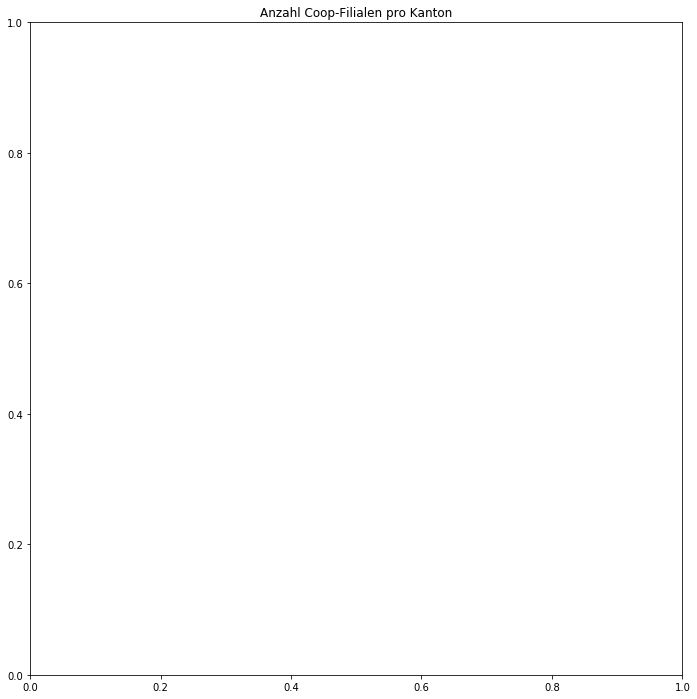

In [35]:
ax = gdf_kantone_anzahl.plot(column='Anzahl', cmap='Blues', scheme='quantiles', edgecolor='white', legend=True, figsize=(12,12))
ax.set_title('Anzahl Coop-Filialen pro Kanton')